In [1]:
#EDA (Exploratory data analysis)

In [2]:
import pandas as pd

In [3]:
import ipywidgets as widgets

In [4]:
import seaborn as sns

In [5]:
from pysentimiento.preprocessing import preprocess_tweet

2024-03-23 16:38:35.036346: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 16:38:35.070651: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 16:38:35.070682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 16:38:35.071616: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 16:38:35.077415: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

In [6]:
#Helper Functions

In [7]:
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

In [8]:
#Read Data

In [9]:
# merging two csv files 
df = pd.concat( 
    map(pd.read_csv, ['data/raw_dataset-01.csv',
                      'data/raw_dataset-02.csv',
                      'data/raw_dataset-03.csv',
                      'data/raw_dataset-04.csv',
                      'data/raw_dataset-05.csv']), ignore_index=True) 
# print(df) 

# df = pd.read_csv(r'data/raw_dataset-01.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11867 entries, 0 to 11866
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11867 non-null  object
 1   label   11867 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 185.5+ KB


In [3]:
import re
from typing import Union, List
import string

class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text
    
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text
# r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"
clean = CleanText(clean_pattern=r"[^A-ZÁÉÍÓÚÜÑÇĞÜŞİÖÇIa-záéíóúüñçğüışöçĞÜŞİÖÇI'öşöç0-9.\"',()]")

In [4]:
def remove_accent(text):
    # Regex para identificar caracteres no deseados
    regex = r"[^A-ZÁÉÍÓÚÜÑÇĞÜŞİÖÇIa-záéíóúüñçğüışöçĞÜŞİÖÇI'öşöç0-9.\"',()]"
    
    # Reemplazar caracteres no deseados por una cadena vacía
    texto_limpio = re.sub(regex, ' ', text)
    texto_limpio = re.sub(r'\s+', ' ', texto_limpio)  # Reemplazar múltiples espacios por uno solo

    
    return texto_limpio

In [20]:
texto_limpiado = clean("¡Hola, cómo estás? ¡Todo bien aquí! 12345")
print(texto_limpiado)

[[' Hola, cómo estás   Todo bien aquí  12345']]


In [21]:
!pip install unidecode

  Obtaining dependency information for unidecode from https://files.pythonhosted.org/packages/84/b7/6ec57841fb67c98f52fc8e4a2d96df60059637cba077edc569a302a8ffc7/Unidecode-1.3.8-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 13.8 MB/s eta 0:00:00


In [22]:
from unidecode import unidecode

texto_con_tildes = "¡Hola, cómo estás? ¡Todo bien aquí! 12345"

texto_sin_tildes = unidecode(texto_con_tildes)

print("Texto original:")
print(texto_con_tildes)
print("\nTexto sin tildes:")
print(texto_sin_tildes)

Texto original:
¡Hola, cómo estás? ¡Todo bien aquí! 12345

Texto sin tildes:
!Hola, como estas? !Todo bien aqui! 12345


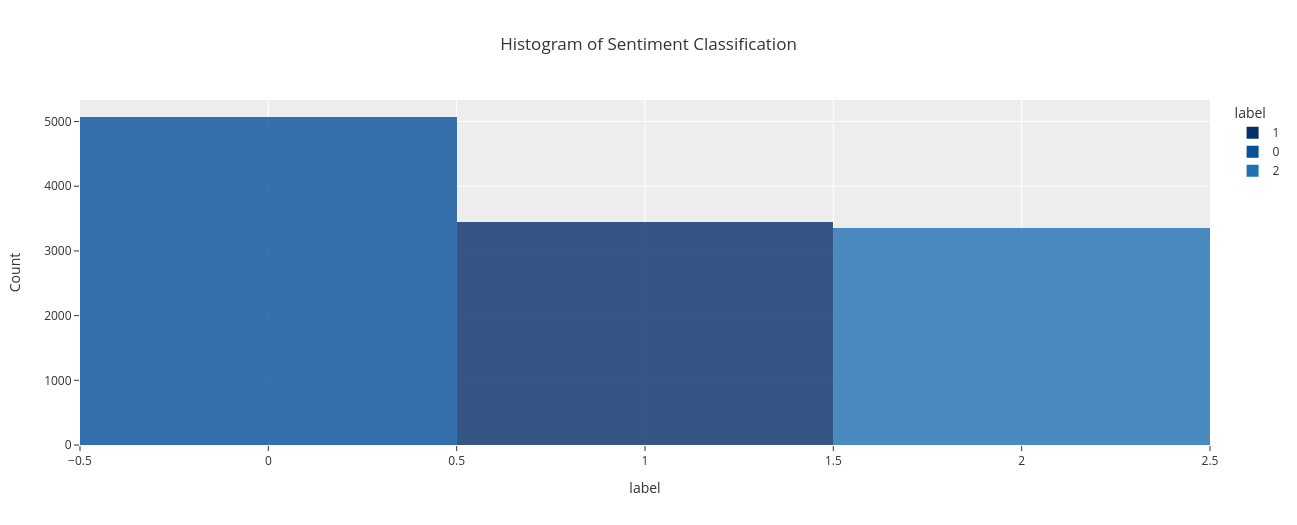

In [13]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# count of ratings
fig = px.histogram(df,
             x = 'label',
             title = 'Histogram of Sentiment Classification',
             template = 'ggplot2',
             color = 'label',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [14]:
# encode label and mapping label name
#df["label"] = df["label"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [15]:
# clean text, lowercase and remove punk
# df["text"] = df["text"].apply(lambda x: preprocess_tweet(x))
df["text_original"] = df["text"]
#df["text"] = df["text"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))
df["text"] = df["text"].apply(lambda x: preprocess_tweet(x.lower(), demoji=False))

In [16]:
df.head()

text  label label_name text_original
0    oe chacal      1    Neutral     Oe Chacal
1    anda vete      0   Negative     Anda vete
2   a la firme      1    Neutral    a la firme
3   chau, cojo      0   Negative    Chau, cojo
4  tengo plata      1    Neutral   Tengo plata

In [17]:
df.sample(n = 30)

text  label label_name  \
533         mi viejo era crema, se murió de tuberculosis      0   Negative   
2879   esa gente esta en congreso dios mio😮😱😡me da co...      0   Negative   
10934  hay caray ya van dos chicas otakus que me para...      2   Positive   
10853  stêvê cordova rueda ya pero, yo quiero decir (...      2   Positive   
3900            xiomara paloma buscame trucha ahumada 🤤🤤      1    Neutral   
10010  así es mi querido beto que se largue ese impre...      0   Negative   
9854                        un calientito para el frío 😀      2   Positive   
6109   claro q si x delivery 5 porciones de truchas 😋😋😋🙏      1    Neutral   
9006   hace 45 años, nuestro 🇵🇪hashtag perú🇵🇪 desde m...      0   Negative   
8648   es se negrito pelado tendrá gran expertis pero...      1    Neutral   
8061   piscina a cualquier hora, playita al atardecer...      2   Positive   
10897  yo que mande el pésame hace una semana, discul...      2   Positive   
11243  chicas inteligentes, brillantes, encantadoras ...      2   Positive   
10778  tienes que ir a pachia a comer pastel de choclo 😊      2   Positive   
3926   yo el año pasado hize la piñata a mi niña y me...      2   Positive   
10907  🤝🏻te la comes tu, o me la como yo🤝🏻  💮wenas ge...      2   Positive   
3507   el delincuente corrupto lagarto genocida feliz...      0   Negative   
2677   🐀🐀🍊 pura finta! es el inútil plan de las lakra...      0   Negative   
11220   el pijama de su tía la solterona de 80 años... 🤦      0   Negative   
3456   pamela cabrera alvarez valeria gómez yesenia c...      1    Neutral   
3591   lo que el oligifrenico de ortiz al igual que l...      0   Negative   
4149   de yapa aumentado con agua le dieron por eso d...      1    Neutral   
8684   andrui levano daniel arias aybar tenemos que i...      0   Negative   
9430                     ¡bien manolo! ¡así se habla! 💪🙌      2   Positive   
7132   hashtag cajamarca  mi tierra hermosa y solidar...      2   Positive   
6453       alissa garcía. viajaremos hasta ser viejas 🙌🙌      2   Positive   
7050                               lo maximo.. manolo ✌🧡      2   Positive   
8840   se estara cagando de risa tu ex o estará reven...      0   Negative   
10447  me gustó el fulbito de solaly,pero no vi la pe...      2   Positive   
1327       melanie arce rodriguez mira amor que capo!! 🙌      2   Positive   

                                           text_original  
533         Mi viejo era crema, se murió de tuberculosis  
2879   Esa gente esta en Congreso Dios mio😮😱😡me da co...  
10934  Hay caray ya van dos chicas otakus que me para...  
10853  Stêvê Cordova Rueda ya pero, yo quiero decir (...  
3900            Xiomara Paloma buscame trucha Ahumada 🤤🤤  
10010  Así es mi querido Beto que se largue ese impre...  
9854                        UN CALIENTITO PARA EL FRÍO 😀  
6109   Claro q si x delivery 5 porciones de truchas 😋...  
9006   ¶Hace 45 años, nuestro 🇵🇪#PERÚ🇵🇪 desde Morales...  
8648   Es se negrito pelado tendrá gran expertis pero...  
8061   Piscina a cualquier hora, playita al atardecer...  
10897  Yo que mande el pésame hace una semana, discul...  
11243  Chicas inteligentes, brillantes, encantadoras ...  
10778  Tienes que ir a pachia a comer pastel de choclo 😊  
3926   Yo el año pasado hize la piñata a mi niña y me...  
10907  🤝🏻TE LA COMES TU, O ME LA COMO YO🤝🏻  💮WENAS GE...  
3507   El DELINCUENTE CORRUPTO LAGARTO GENOCIDA FELIZ...  
2677   🐀🐀🍊 PURA FINTA! ES EL INÚTIL PLAN DE LAS LAKRA...  
11220  El pijama de su tía la solterona de 80 años.... 🤦  
3456   Pamela Cabrera Alvarez Valeria Gómez Yesenia C...  
3591   Lo que el oligifrenico de Ortiz al igual que l...  
4149   De yapa aumentado con agua le dieron por eso d...  
8684   Andrui Levano Daniel Arias Aybar tenemos que i...  
9430                     ¡bien Manolo! ¡así se habla! 💪🙌  
7132   #Cajamarca  mi tierra hermosa y solidaria, no ...  
6453       Alissa García. Viajaremos hasta ser viejas 🙌🙌  
7050                               Lo ma

In [18]:
#Visualizations

In [19]:
#Word Cloud

In [20]:
from wordcloud import WordCloud


In [21]:

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [22]:

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish'))
stopwords.update([ "x", "xq","q","k","Jajajaa","perra","kieren","verga","jaja", "jjaja"])
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


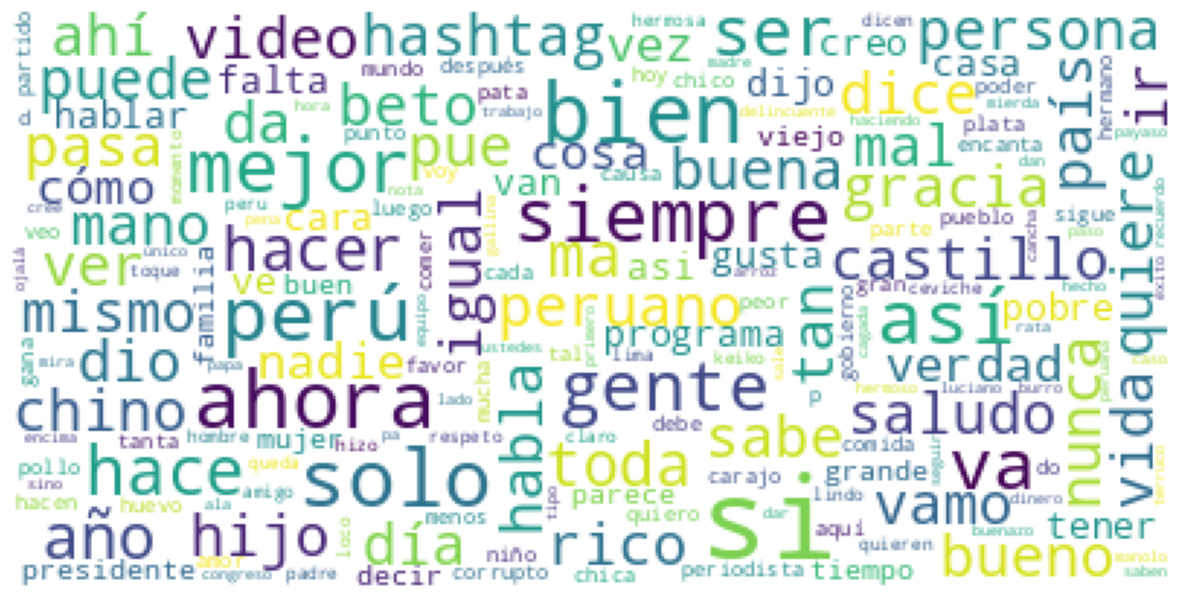

In [23]:
show_wordcloud(df["text"].values)

In [24]:
#Target Count

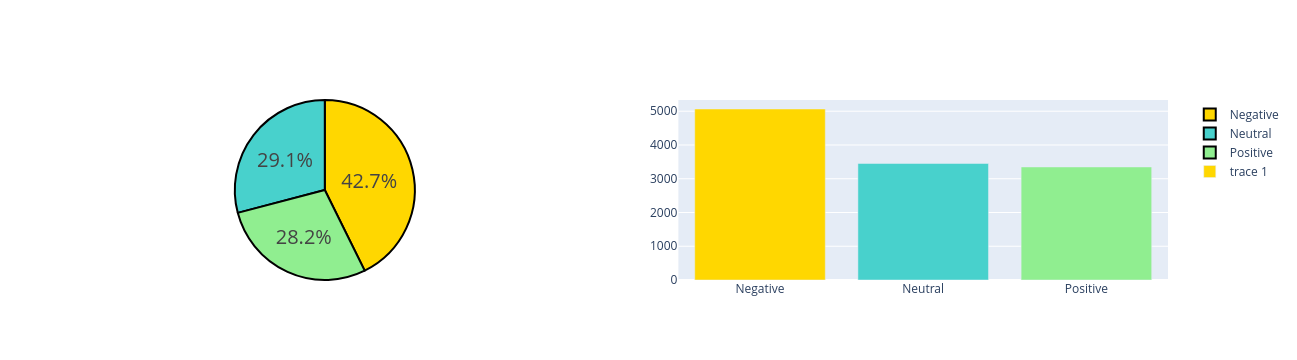

In [25]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

In [26]:
#Token Counts with simple tokenizer¶


In [27]:
# tokenize data
#df["tokenized_text"] = df.text.apply(lambda x: tokenize(x))
df["tokenized_text"] = df.text.apply(lambda x: preprocess_tweet(x, demoji=False))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_text"].apply(lambda x: len(x.split()))

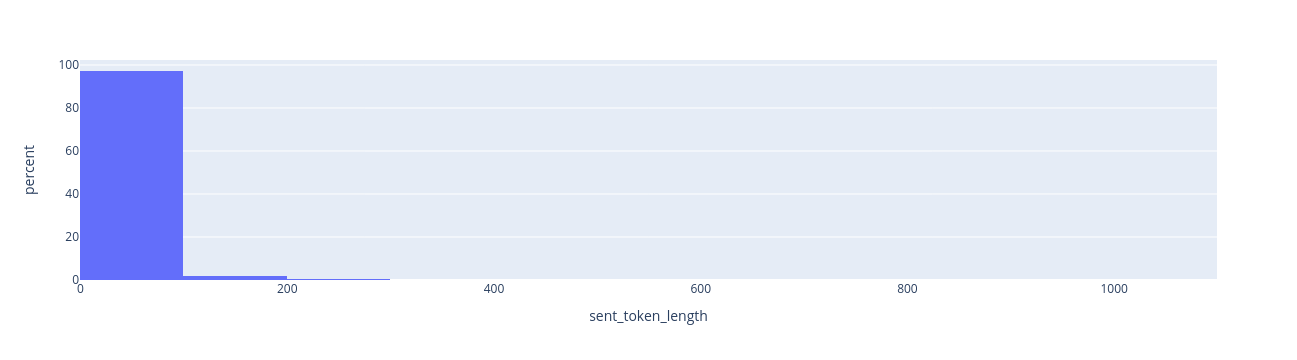

In [28]:
fig = px.histogram(df, x="sent_token_length", nbins=20, barmode='group', histnorm="percent")
fig.show()

In [29]:
(df.sent_token_length < 200).mean()

0.9921631414847898

In [30]:
#Token Counts with roBERTuito tokenizer

In [31]:
from transformers import AutoTokenizer
model_name = "pysentimiento/robertuito-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [32]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["text"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

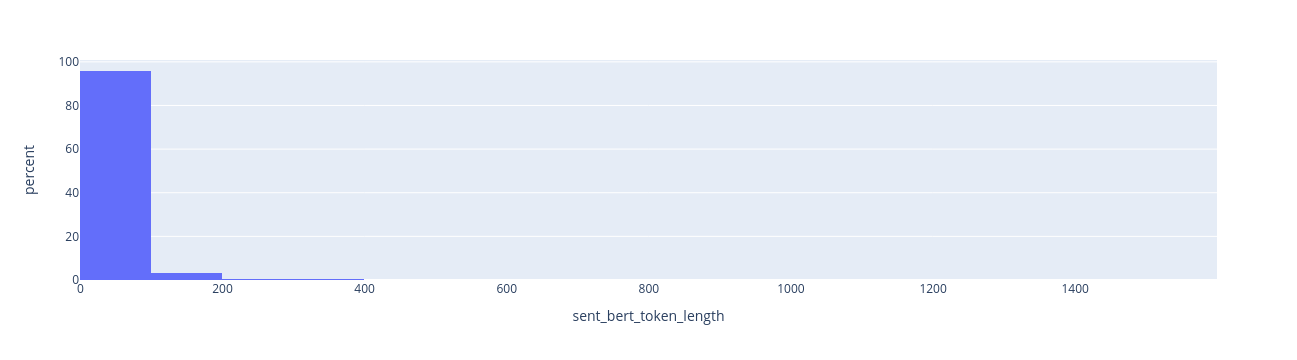

In [33]:
fig = px.histogram(df, x="sent_bert_token_length", nbins=20, barmode='group', histnorm="percent")
fig.show()

In [34]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 200).mean()

0.9894665880171906

In [35]:
#Characters Count in the Data

In [36]:

# valvulate char count for each review
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.histplot(df.loc[:, feature],
                 # kde=True,
                 ax=ax1,
                  binrange=(0, 800)
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

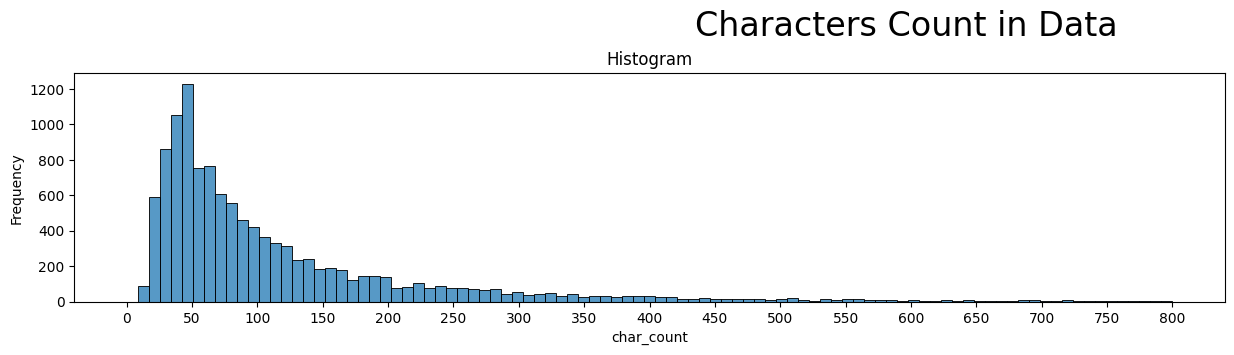

In [37]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

In [38]:
#Reviews Lengths

In [39]:
# Creating a new feature for the visualization.
df['Character Count'] = df['text'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    sns.set_theme()
    sns.set_context("paper")
    sns.set_palette("mako")

    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    
    sns.histplot(df.loc[:, feature],
                 # hist=True,
                 kde=True,
                 ax=ax1)
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.

    sns.histplot(df.loc[:, feature],
                 ax=ax2,
                 kde=True,
                 kde_kws={'cumulative': True})
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

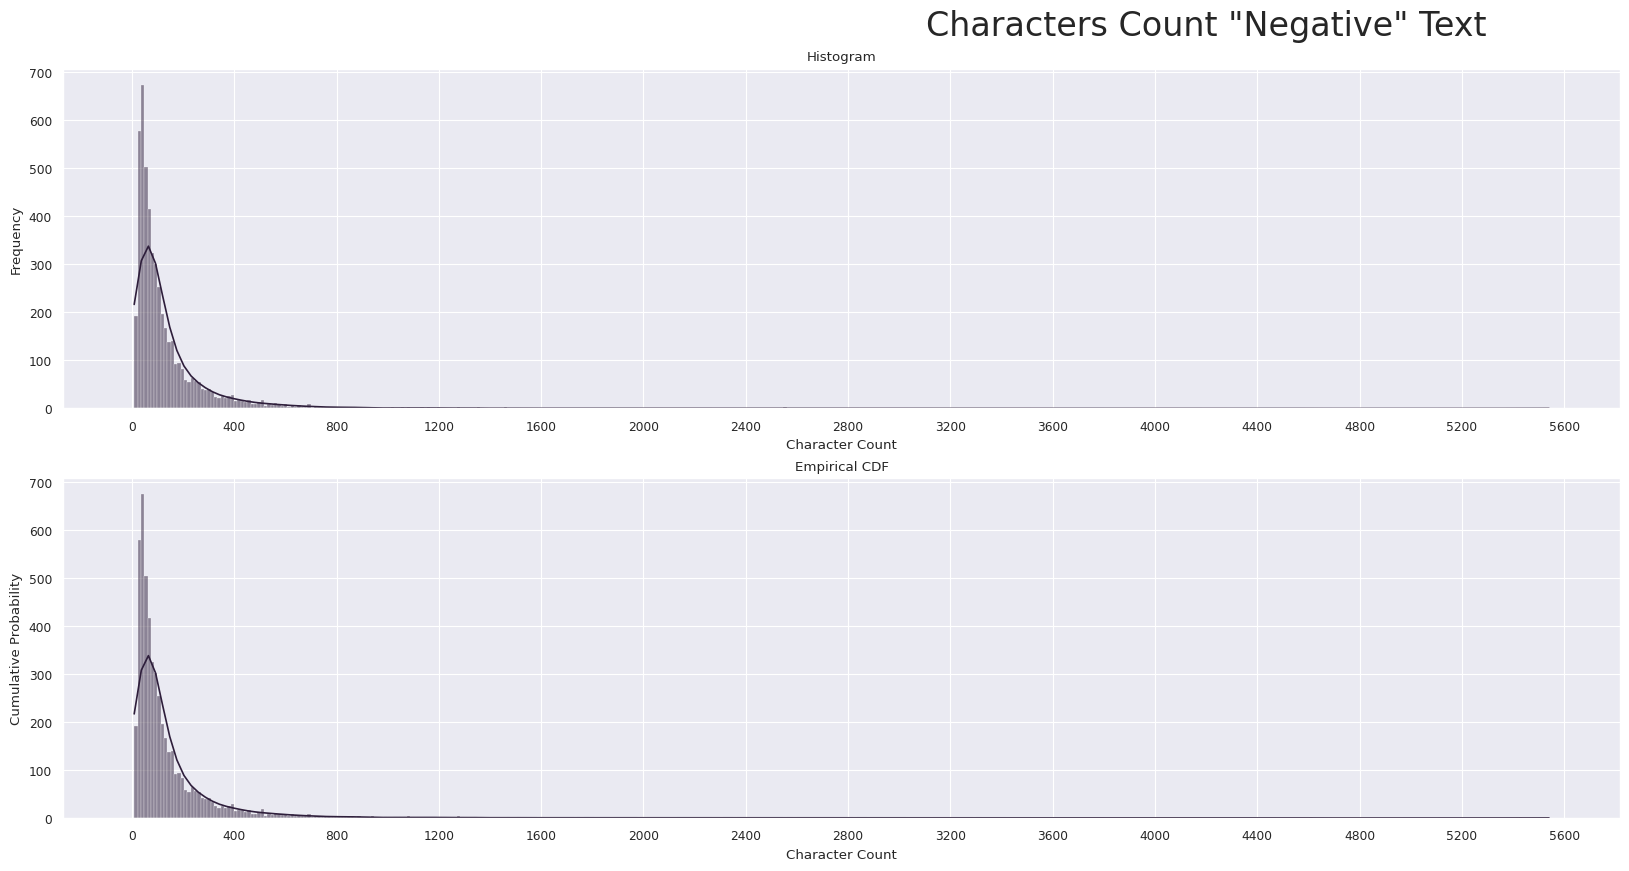

In [40]:
plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Text')

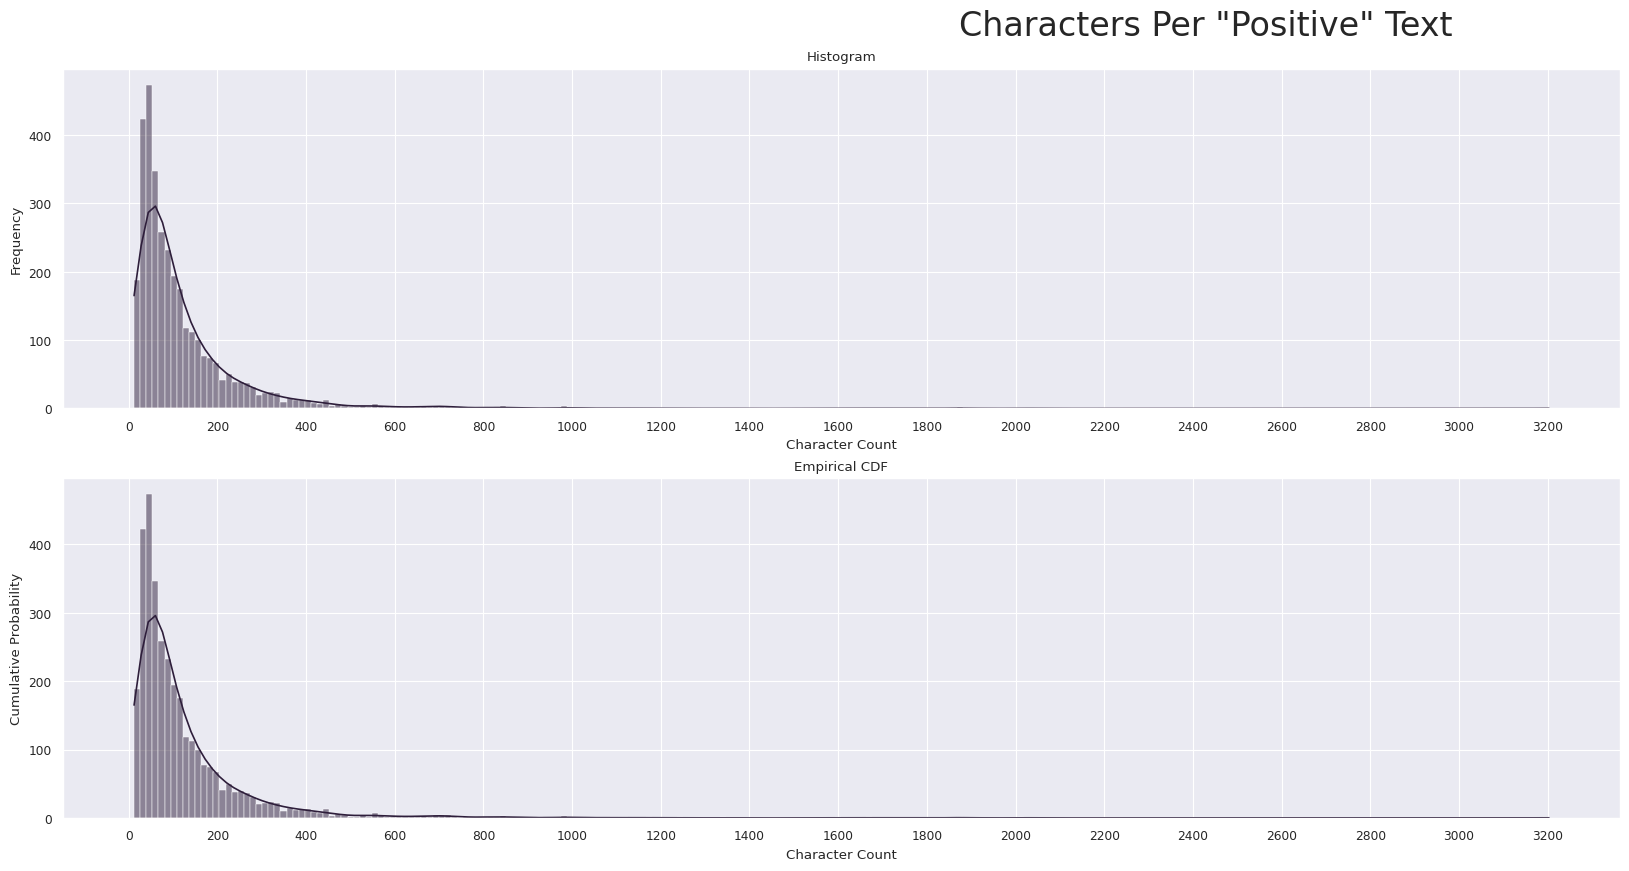

In [41]:
plot_dist3(df[df['label'] == 2], 'Character Count',
           'Characters Per "Positive" Text')

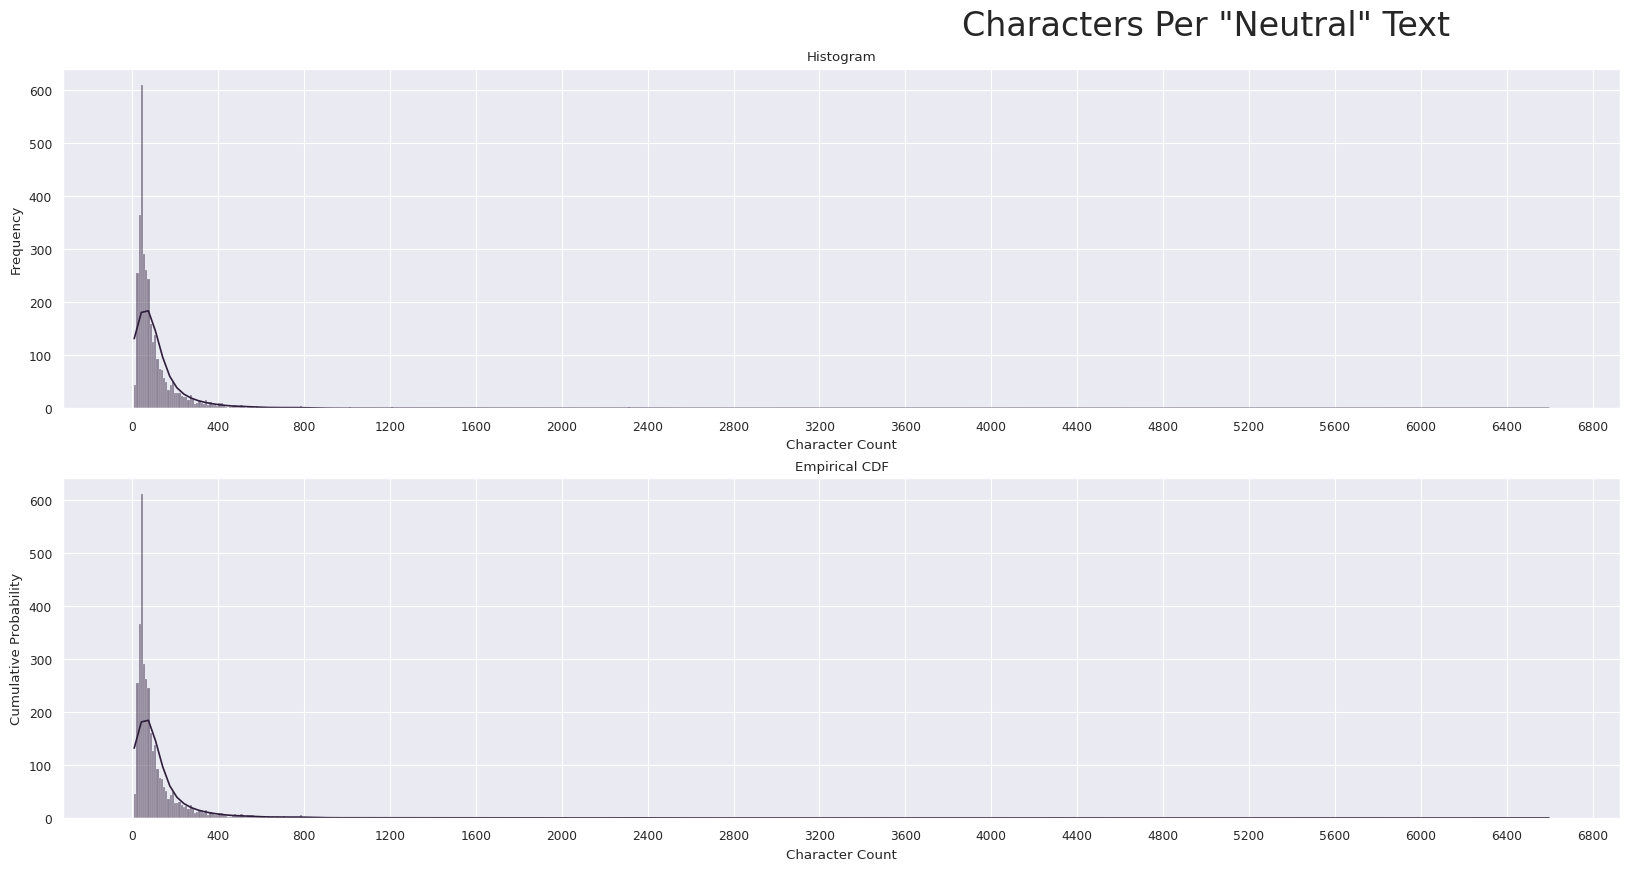

In [42]:
plot_dist3(df[df['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Text')

In [43]:
#Word Counts

In [44]:
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.histplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], kde=True, stat="density", kde_kws=dict(cut=3))
    sns.histplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], kde=True, stat="density", kde_kws=dict(cut=3))
    sns.histplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], kde=True, stat="density", kde_kws=dict(cut=3))

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('positive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

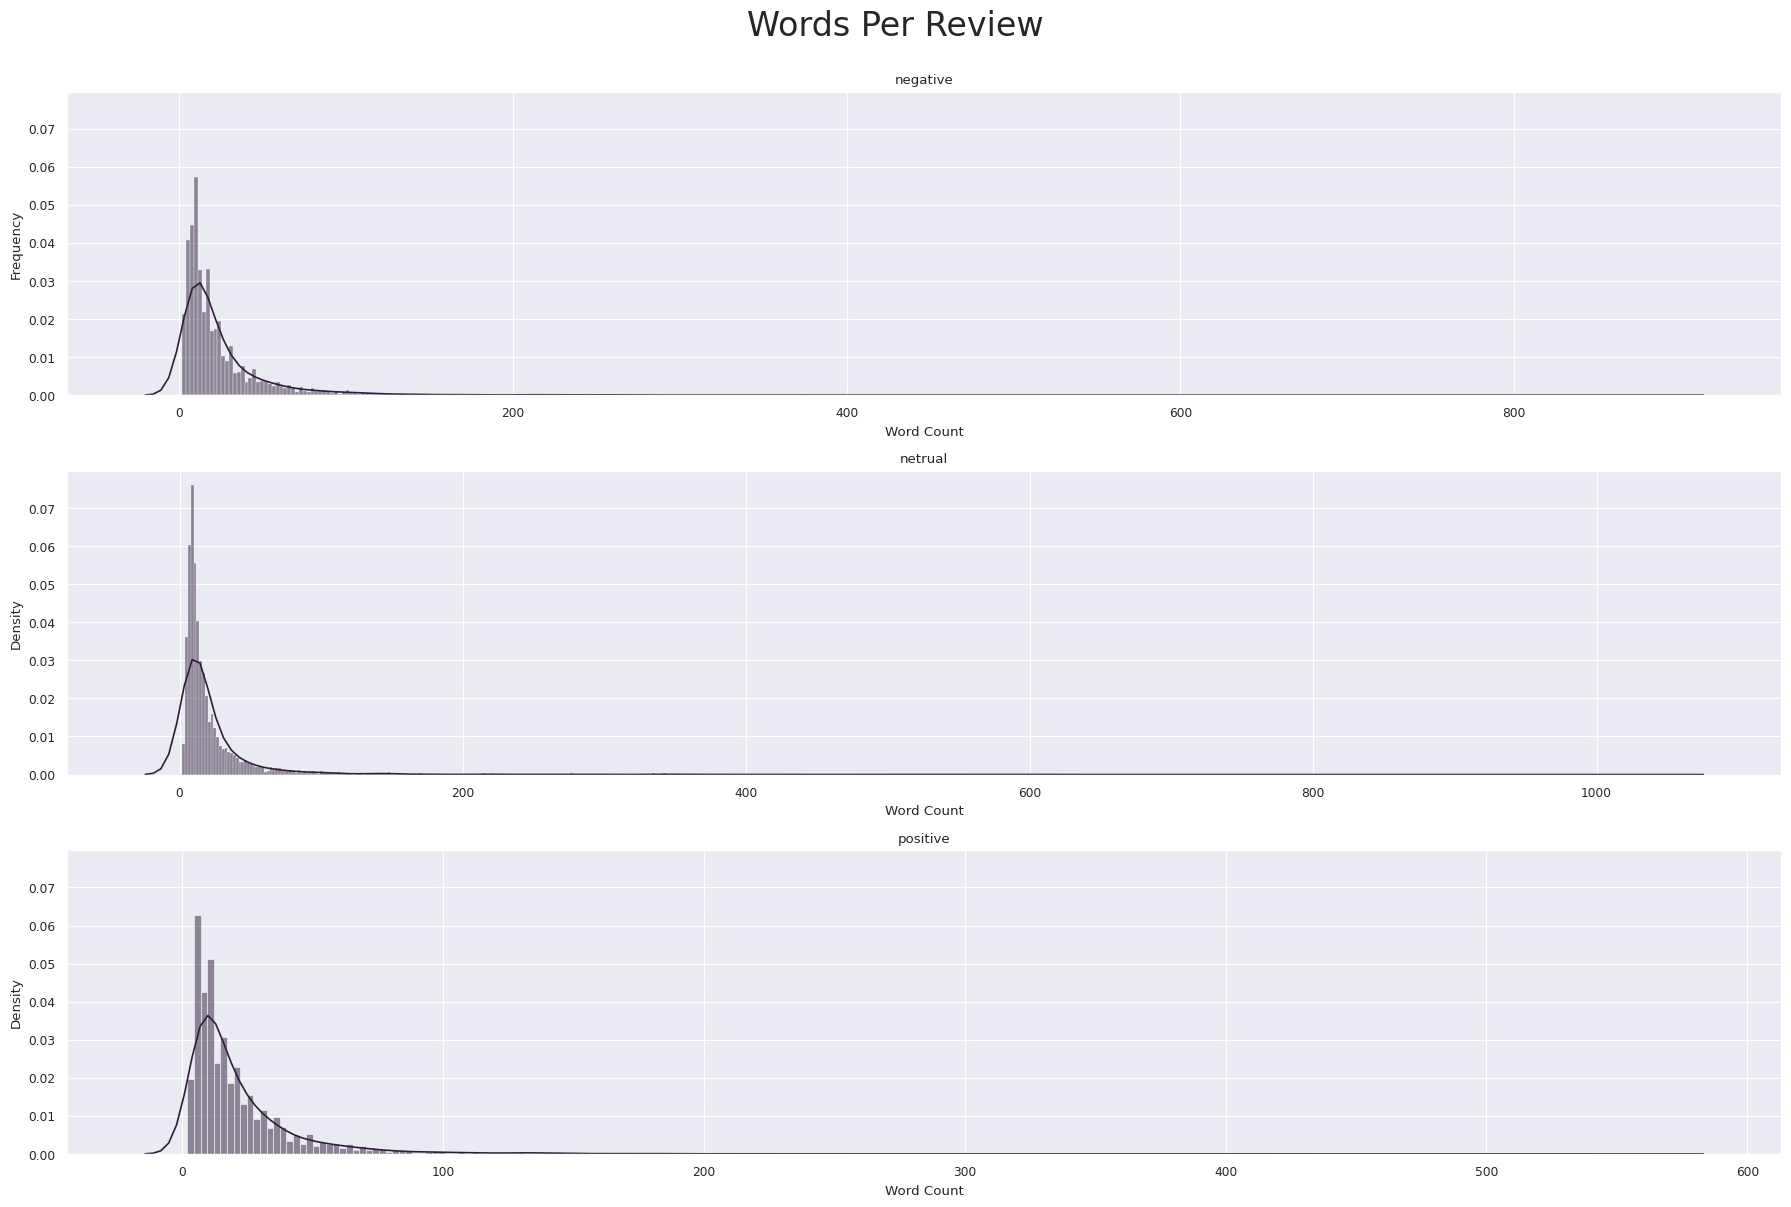

In [45]:
plot_word_number_histogram(df[df['label'] == 0]['text'],
                           df[df['label'] == 1]['text'],
                           df[df['label'] == 2]['text'],
                          )

In [46]:
# remove punk 
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_punct(x))

In [47]:
df['tokenized_text'].sample(40)

8496     saludo desde trujillo   manuela besos a giulia...
3130     todas las poses te salen con las chiquitas man...
10714                el pirata ya es ídolo blanquiazul 👏👏👏
1921              jaja la cagada estos chupa nepes     🤣🤣🤣
8931     luis santos  la tia veneno jaja que te deja 3 ...
4010     que es esto       😢 mientras tanta gente esta ...
7933                       ahí veo interés como cancha 😂😂😂
4304     beto chupame el nepe 😂  quieres   no soy de iz...
2812     brother apurimac ahi caen a la aldea de los pi...
6428     giancarlo la torre  socio que fue con rencoros...
4722             eso va a levantar el mounstro en una 🤣🤣🤣😂
9734                        que cara de palo esta mujer 😤😠
9421                  bien cara de palo está señora 🤣🤣🤣🤡🤡🤡
4222     yo tengo una gata que se llama pelusa amy  y u...
9688     fuerzas nero   así es  aveces es solo cuestión...
11828    lo de alianza lima  chapar cualquier huevada y...
10063    lo mejor de lo mejor👏👏👏👍👍👍🥳🎊🥳🎊🎊🥳 manolo mi pue.

In [48]:
pd.set_option("max_colwidth", 200)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


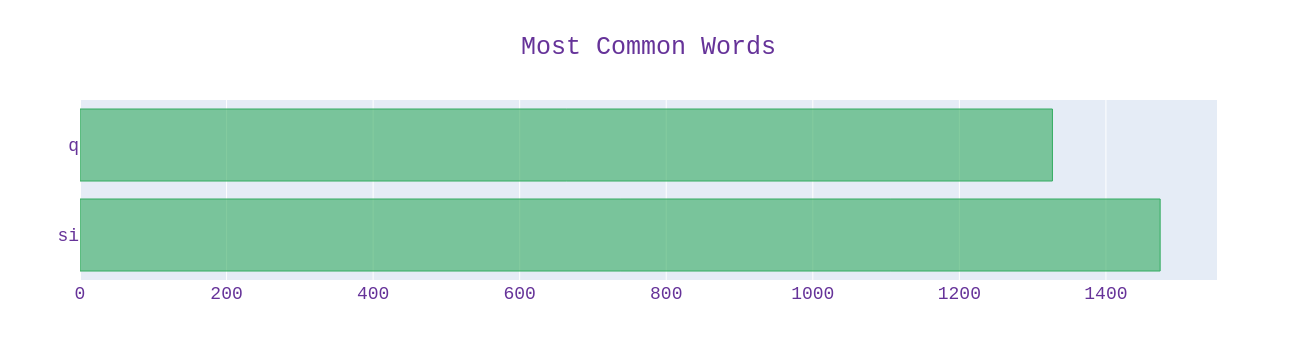

In [49]:
from collections import Counter, defaultdict

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('spanish'))
# stopWords_nltk.update([ "x", "xq","q","k","Jajajaa","perra","kieren","verga","jaja", 'si', 'Y'])

texts = df['tokenized_text']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

In [50]:
#Most Common ngrams

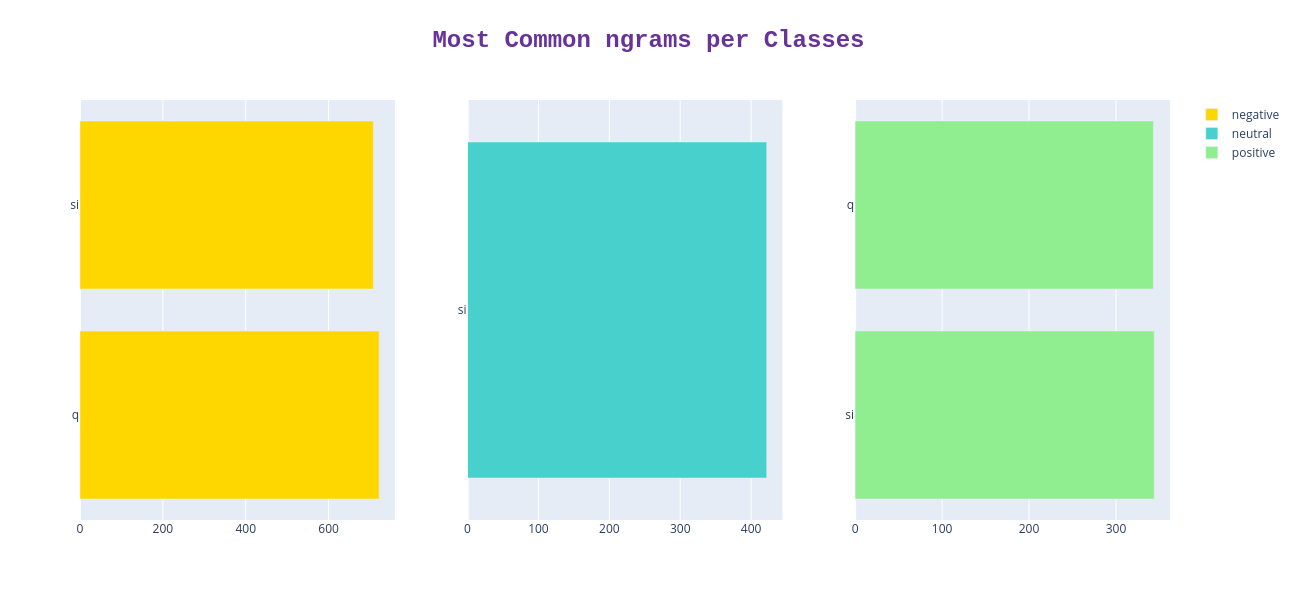

In [51]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

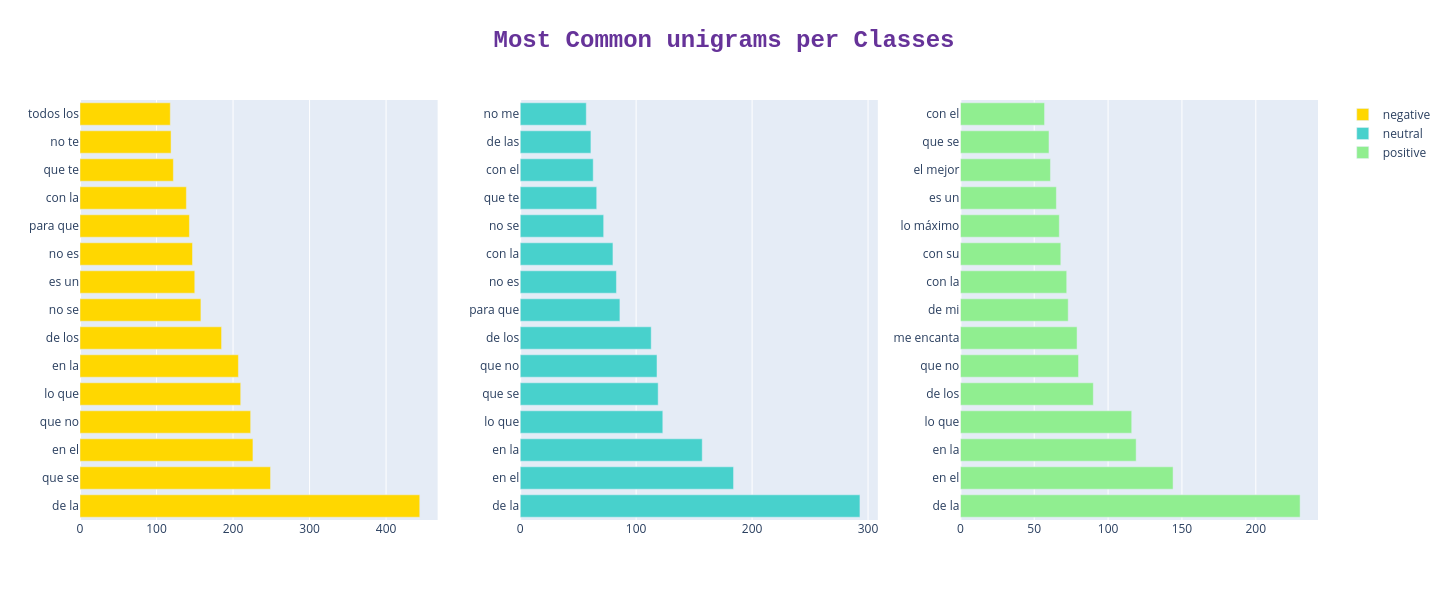

In [53]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

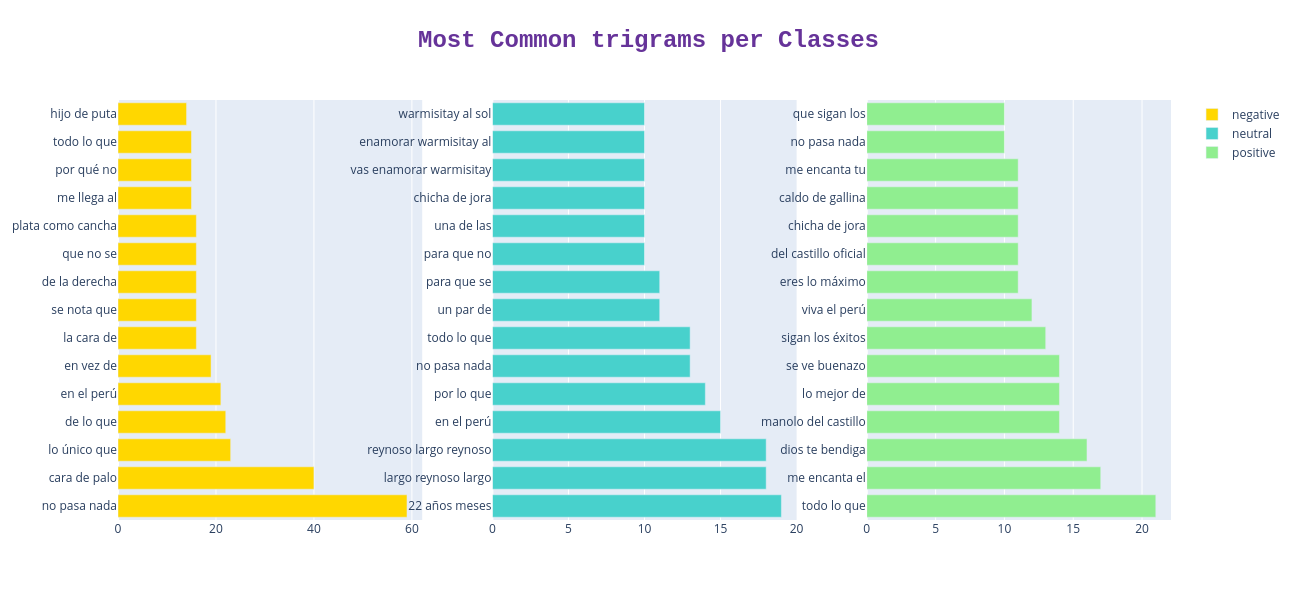

In [54]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show()

In [55]:
#split train test
from sklearn.model_selection import train_test_split


random_state=1
train_df_, val_df = train_test_split(df, 
                                    test_size=0.20, 
                                    random_state=random_state, 
                            stratify=df.label.values)

In [56]:

train_df, test_df = train_test_split(train_df_, 
                                    test_size=0.20, 
                                    random_state=42, 
                            stratify=train_df_.label.values)

In [57]:
train_df.to_csv('data/train.csv', index=False)
val_df.to_csv('data/val.csv', index=False)
test_df.to_csv('data/test.csv', index=False)


In [58]:
!ls -l

total 6756
-rw-rw-r-- 1 darkstar darkstar   56082 Mar 23 11:49  01-build-datasets.ipynb
-rw-rw-r-- 1 darkstar darkstar 6352241 Mar 23 16:38  02-pilot-eda.ipynb
-rw-rw-r-- 1 darkstar darkstar   51710 Mar 23 15:42  03-pilot-train.ipynb
-rw-rw-r-- 1 darkstar darkstar   18616 Mar 17 13:35  04-pilot-train-bertuit.ipynb
-rw-rw-r-- 1 darkstar darkstar   41023 Mar 18 00:39  04-pilot-train-beto.ipynb
-rw-rw-r-- 1 darkstar darkstar   50066 Mar 17 13:39  04-pilot-train-maria.ipynb
-rw-r--r-- 1 darkstar darkstar  263345 Mar 17 13:35  BETO_for_text_classification.ipynb
drwxrwxr-x 3 darkstar darkstar    4096 Mar 23 09:32  data
-rw-rw-r-- 1 darkstar darkstar     618 Jan  9 21:00 'Emoticon filter.ipynb'
-rw-rw-r-- 1 darkstar darkstar    2137 Dec 14 00:37 'Example multiprocessing.ipynb'
-rw-rw-r-- 1 darkstar darkstar   48082 Mar 18 00:52  Gemma-fine-tuning.ipynb
drwxrwxr-x 6 darkstar darkstar    4096 Mar 23 15:21  trainer_robertuito
-rw-rw-r-- 1 darkstar darkstar      82 Mar 23 15:42  val_df_confusion.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [59]:
len(train_df)

7594

In [60]:
len(val_df)

2374

In [61]:
len(test_df)

1899

In [62]:
test_df.head()

text  \
10530                                                       y cuantas chanchas habran hecho para la salvadora de la democracia?..🤔   
5632                                                                                                           tremenda joyita 💜💜💜   
6420   entre cabros se entienden altamirano gómez alain gerard... y de pasadita dale su beso y mepaso en su pelacho a la beto... 😂   
6475                                                                                       chino llevalo al camal, a ese puerco 🤣🤣   
5774                                                                                    apoyo de 4 gato y un perro con virolo...🥲😅   

       label label_name  \
10530      1    Neutral   
5632       0   Negative   
6420       0   Negative   
6475       0   Negative   
5774       0   Negative   

                                                                                                                     text_original  \
10530                                                       Y cuantas chanchas habran hecho para la salvadora de la democracia?..🤔   
5632                                                                                                          Tremenda joyita 💜💜💜💜   
6420   Entre cabros se entienden Altamirano Gómez Alain Gerard... Y de pasadita dale su beso y mepaso en su pelacho a la Beto... 😂   
6475                                                                                       Chino llevalo al camal, a ese puerco 🤣🤣   
5774                                                                                    Apoyo de 4 gato y un perro con virolo...🥲😅   

                                                                                                                    tokenized_text  \
10530                                                       y cuantas chanchas habran hecho para la salvadora de la democracia   🤔   
5632                                                                                                           tremenda joyita 💜💜💜   
6420   entre cabros se entienden altamirano gómez alain gerard    y de pasadita dale su beso y mepaso en su pelacho a la beto    😂   
6475                                                                                       chino llevalo al camal  a ese puerco 🤣🤣   
5774                                                                                    apoyo de 4 gato y un perro con virolo   🥲😅   

       sent_token_length  sent_bert_token_length  char_count  Character Count  
10530                 11                      15          70               70  
5632                   3                       3          19               19  
6420                  23                      33         123              123  
6475                   8                      12          39               39  
5774                   9                      11          42               42

In [63]:
df.sample(n = 30)

text  \
2876                                                                                                                                                                            con una cachetada lo soño  🤔🤔🤔   
11583                   es el segundo video que veo, y me gustó mucho, me gusta como cocinas hermano jaj al calculo y como todo buen peruano con la yapa en todo porsiaca, un saludo desde puerto maldonado 🇵🇪   
11277                                                                                                                                        cuando eres de cono pero te inspiras en hablar como pituco monse😂   
9410   por ese postre mato por casualidad comí lucumita de tanta esperando mi vuelo en el aeropuerto jorge chávez. que postre tan esquisito permite saborear la lucuma tal.cual es cuándo esta madura cremo...   
8918   ¡ excelente... me encantó esta entrevista! las chicas chilenas muy naturales en su forma de ser y hablar, no como ciertas peruanas que fingen la voz  y se hacen las tiernas para caer bien jaja (ya...   
7248                                                                                                                            que quedé kimberly y se largueee !!! la mucama que es aburrida ése personaje 👍   
5798                                                                                                                                                  que miedo los venecos te matan por un poco de comida 🔫🐒💩   
4718                                                                                                                             que lindo  me hacer recordar a mí padre le gustaba la marinera trujillana 👍👍👍   
6297                                                                                                                                                                                  igualito a mi causa 🤣😂😂😂   
7521              commandos???  simplones razos shi sheñó nomas eran...  me dan risa estos payasos, hasta incluso más de las babosadas que habla castigil... aclarando para que los fujiasnos no se arañen 🤣🤣🤣   
8757   gareca voltea y piensa en voz alta sonriente... este csm 😅🤣😂. por un momento pensé que era españa, pero al ver los separadores despintados, me confirmó que era en perú 😀😅😂 (autoridades choras, que...   
11212                                                                                                                                                  chau chau chau app ,uno más que no llegará a gobernar 👎   
3336                                                                                                                                                  alfredo llantoy ayassca  nomas pobres en un país rico🤣🤣🤣   
8717                           feliz cumpleaños tigre 🐅  y gracias por tantas alegrías al perú y a argentina 🇵🇪🇦🇷 queremos otra alegría de ir a otro mundial y te ponemos un monumento en el estadio nacional.   
475                                                                                                                                                                   yo vine con la idea de quedarme a jatear   
6158                             al igual que me hijo...siempre se escabulle para picar cualquier dulce o sándwich y luego de que nadie se da cuenta (solo yo) sigue bailando como si nada hubiera pasado 😂😂😂👣   
11724                                                                                               tendré que probar esos churros, he pasado por ahí y nunca me percaté... y esos anticuchos¡¡ buenazooo... 😅   
8374                                                                                                                         xoana es hermosa, perfecta... y la chueconaaa❓❓🌹🥰 es buena cómica y me da risa🤭🤭🤭   
7534                                                                     a la firme los catadores de panetones a mi parecer, no pasa nada... 0.000/10 😁🤣 para gustos y colores está bien pero... 5mntarios. 🤪☕   
71